In [1]:
import CleaningData as cd
import BackwardSelection as bs
import numpy as np
import pandas as pd
import MixtureGaussiansOptimized as mg
import MLP as mlp
import importlib 
import LinearModel as lm
import LogisticModel as logm
import Decision_Tree as dt
import AdaBoost as ab
from sklearn.model_selection import train_test_split

Feature Selection
===

Número de datos en categoría 0:  13970
Número de datos en categoría 1:  36470
--------promedios y desviaciones estandar de categoria 0 y categoria 0 datos sinteticos--------
promedio de categoria 0:  [  78.28289191   74.86936292 1256.82269148   18.1392985   308.2765927 ]
promedio de categoria 0 datos sinteticos:  [  77.95108908   74.73833344 1250.49243324   18.2352808   285.52839181]
desviacion de categoria 0:  [  33.61213565  214.32635899 1524.92457022   25.77896093 2735.20832111]
desviacion de categoria 0 datos sinteticos:  [  32.59165636  214.34957844 1526.96719376   27.81399257 1963.26515238]


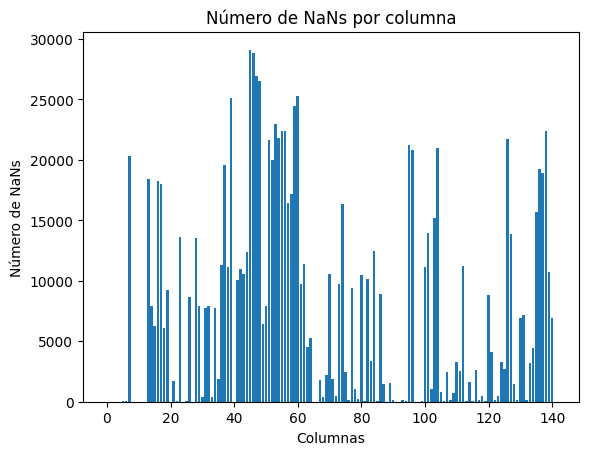

In [2]:
cd.main()

BackwardSelection
===

In [92]:
winner_group_class_1,winner_group_class_2,NamesInDataSet=bs.main(desire_features=5)

El nombre del grupo ganador es ['PROM_HNV', 'GRAPROES_F', 'GRAPROES_M', 'PROM_OCUP', 'PRO_OCUP_C']
los datos de entrenamiento se guardaron en training_data_backwards_selection.csv


Cargamos datos que se usarán en los modelos
===

In [93]:
data_backwards_selection=pd.read_csv('training_data_backwards_selection.csv', index_col=0)
Y_backwards_selection=(data_backwards_selection['categoria']).to_numpy()
X_backwards_selection=(data_backwards_selection.drop(columns=['categoria'])).to_numpy()

print('shape X',X_backwards_selection.shape)
print('shape Y',Y_backwards_selection.shape)

shape X (55880, 5)
shape Y (55880,)


Data Split

In [94]:
#-----------split the data into 70% train 20% validation and 10% test---------
#first divide into 70% train and 30% test+val
X_train, X_test_val, y_train, y_test_val = train_test_split(X_backwards_selection, Y_backwards_selection, test_size=0.3, random_state=1, shuffle=True, stratify=None)

X_val, X_test, y_val, y_test = train_test_split(X_test_val, y_test_val, test_size=1/3,
                                                  random_state=1,shuffle=True, stratify=None) # 0.3 x 1/3 = 0.1
print('shape X_train',X_train.shape,'shape y_train',y_train.shape)
print('shape X_val',X_val.shape,'shape y_val',y_val.shape)
print('shape X_test',X_test.shape,'shape y_test',y_test.shape)

shape X_train (39116, 5) shape y_train (39116,)
shape X_val (11176, 5) shape y_val (11176,)
shape X_test (5588, 5) shape y_test (5588,)


Mixture of Gaussians
===

calculando step: 0
calculando step: 1
calculando step: 2
calculando step: 3
mu gausian 1 [ 0.42359224 -0.66720804 -0.68553923  0.40990616  0.54655747]
----------Train Metrics----------
precision: 0.9386586546897888
recall: 0.6335707306861877
accuracy: 0.7950199246406555
----------Validation Metrics----------
precision: 0.9301146864891052
recall: 0.6294223666191101
accuracy: 0.792859673500061


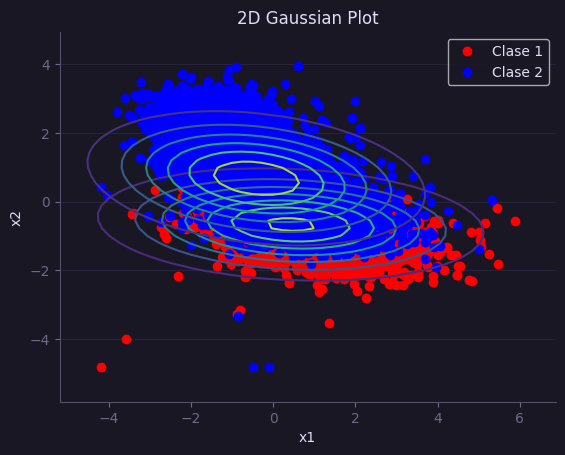

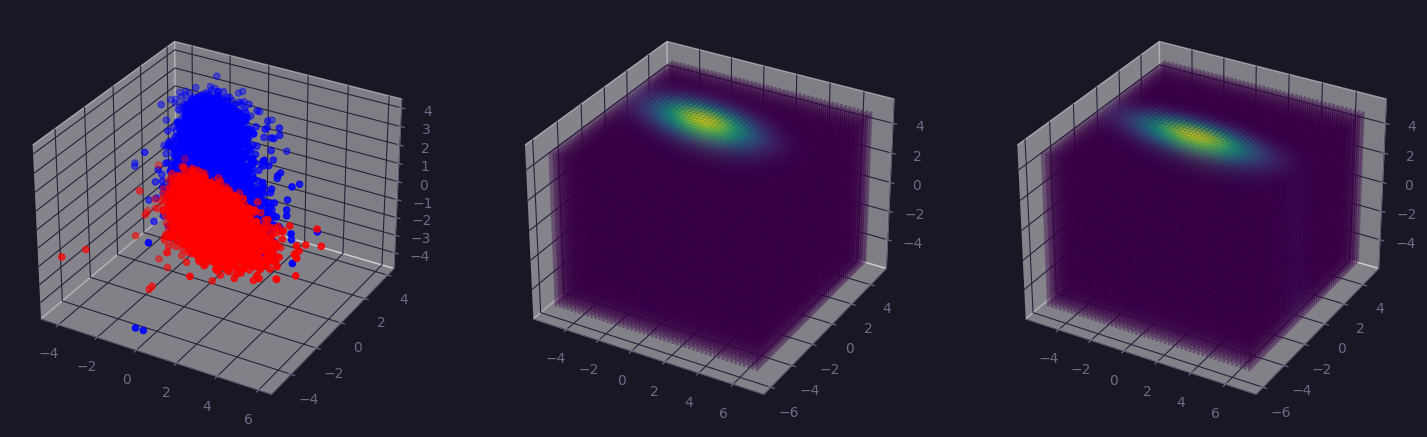

In [95]:
importlib.reload(mg)
mus,sigmas,pis,precision,recall,accuracy=mg.MixtureOfGaussians(X_train,y_train,X_val,y_val, NumberOfSteps=4)

Multilayer Perceptron
===

training ------> step= 200 lost: 0.449, acuracy: 0.794, recall: 0.750,precisions: 0.824             
-------------------------final metrics-----------------------------
step= 203 lost: 0.447, acuracy: 0.794, recall: 0.751,precisions: 0.824


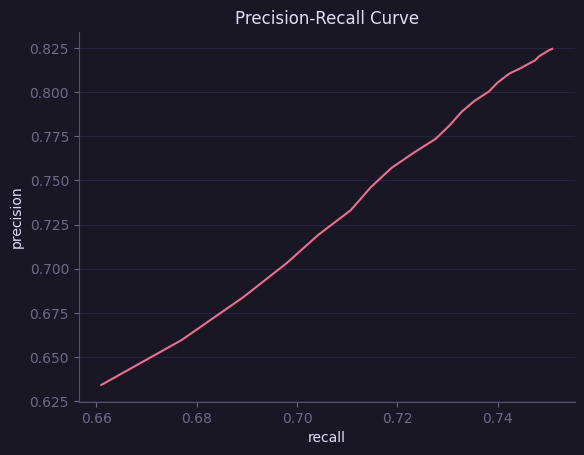

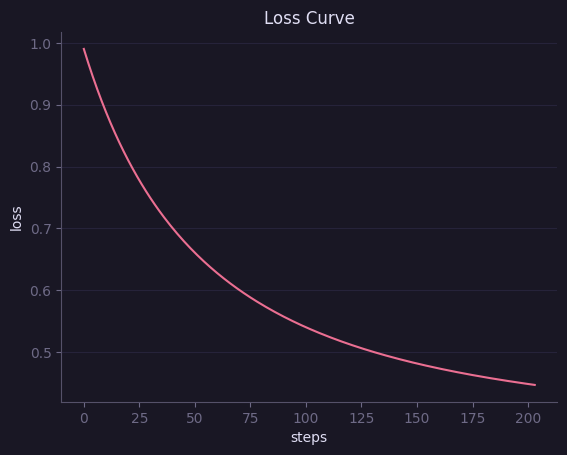

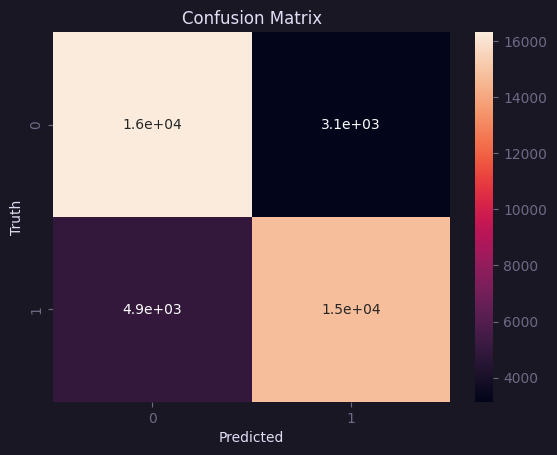


-------------------------Validation metrics-----------------------------
validation metrics: acuracy: 0.789, recall: 0.747,precisions: 0.813


In [81]:
importlib.reload(mlp)
#primera capa igual al numero de features
topology=[X_train.shape[1],20,15,2]
recalls,precisions,loss,last_prediccion,trained_params=mlp.trainig_jax_model(X_train,y_train,X_val,y_val,
                                                              topology,steps=10000,lr=0.01,threshold=0.0005,precision_recall_steps=10)

Clasificador lineal
===

Gradient descent

In [82]:
theta, y_hat, precision, recall, accuracy=lm.descenso_gradiente(X_train,y_train,X_val,y_val,steps=10000,lr=0.00000044)

step: 0, error: 198804.984
step: 2000, error: 20549.531
step: 4000, error: 20549.520
step: 6000, error: 20549.520
step: 8000, error: 20549.520
----------------------Metricas con datos de entrenamiento----------------------
precision: 0.9482953548431396
recall: 0.725788414478302
accuracy: 0.8422896265983582
----------------------Metricas con datos de validacion----------------------
precision_val: 0.9450989365577698
recall_val: 0.724007248878479
accuracy_val: 0.8423407077789307


Ridge Regression

In [83]:
w_rigdge, y_hat_ridge,precision, recall, acuracy= lm.RidgeRegresion(X_train,y_train,X_val,y_val, 0.2)

0.2
----------------------Metricas con datos de entrenamiento----------------------
precision: 0.9482953548431396
recall: 0.725788414478302
accuracy: 0.8422896265983582
----------------------Metricas con datos de validacion----------------------
precision_val: 0.4957050681114197
recall_val: 0.379742294549942
accuracy_val: 0.5010330080986023


Logistic
====

In [84]:
#tener cuidado, ya que con muchos features, y ademá linealmente dependientes, loss diverge,con 10 ha funcionado bien por ahora
#logistic funciona con datos entre 0 y 1 y recordar darle un pequeño lamda
w_logistic,Y_hat, precision, recall, accuracy=logm.LogisticRegression(X=X_train, Y=y_train,X_val=X_val ,Y_val=y_val ,lr=0.0023,tol=1e-3,lamda=0.1, n_max_steps=1000)

step: 0 loss: -41974.7578125
step: 200 loss: nan
step: 400 loss: nan
step: 600 loss: nan
step: 800 loss: nan
step: 1000 loss: nan
----------------------Metricas con datos de entrenamiento----------------------
precision: 0.0
recall: 0.0
accuracy: 0.4973923861980438
----------------------Metricas con datos de validacion----------------------
precision: 0.0
recall: 0.0
accuracy: 0.5042949318885803


Decision Tree
===

----------------------Metricas con datos de entrenamiento----------------------
precision:  0.5026076436042786
recall:  1.0
accuracy:  0.5026076436042786
----------------------Metricas con datos de validacion----------------------
precision:  0.4957050681114197
recall:  1.0
accuracy:  0.4957050681114197


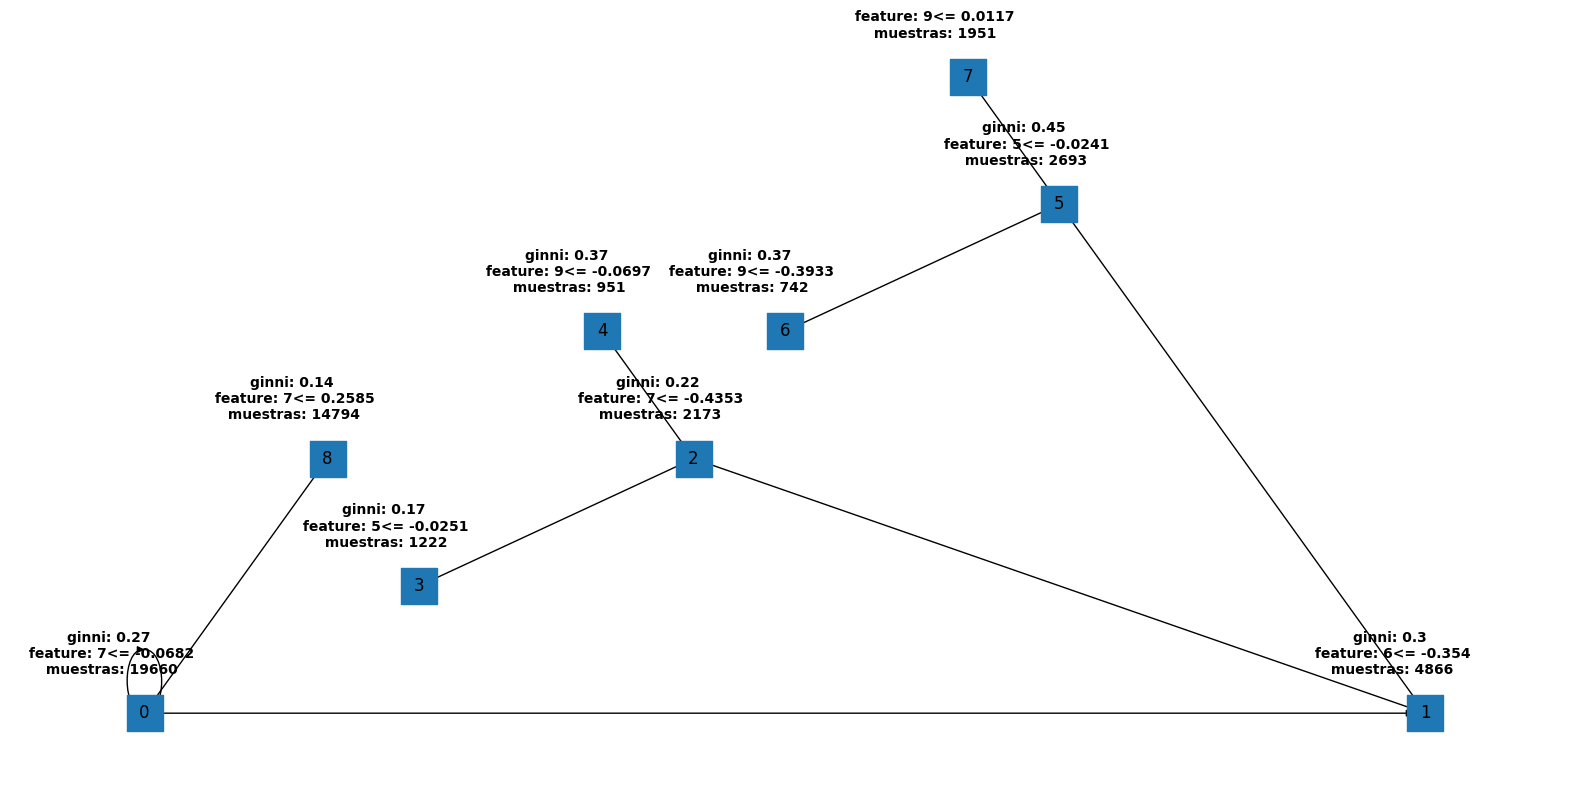

In [85]:

importlib.reload(dt)
max_depth=4
min_gini=0.1
prediction, precision, recall, accuracy=dt.main_tree_train(X_train,y_train,X_val,y_val, max_depth, min_gini)

AdaBoost
===

In [86]:
num_stumps=5
importlib.reload(dt)
importlib.reload(ab)

predictions, precision, recall, accuracy=ab.main_AdaBoost(X_train, y_train,X_val,y_val, num_stumps)

----------------------Metricas con datos de entrenamiento----------------------
precision:  0.5026076436042786
recall:  1.0
accuracy:  0.5026076436042786
----------------------Metricas con datos de validacion----------------------
precision_val:  0.4957050681114197
recall_val:  1.0
accuracy_val:  0.4957050681114197
